### Gerekli kütüphaneleri Yükleme


In [102]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

### Veri setini yükleme

In [103]:
df = pd.read_csv('NLPlabeledData.tsv', delimiter="\t", quoting=3)

### Veri setini gösterme

In [104]:
df.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


### Veri setinde kaç tane inceleme olduğunu gösterme

In [105]:
len(df["review"])

25000

### Doğal dil işleme için nltk kütüphanesinden stopwords (gereksiz kelimeler) indirme

In [106]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\erenn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Örnek bir inceleme gösterme

In [107]:
sample_review = df.review[0]
sample_review

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally

### HTML etiketlerini BeautifulSoup kullanarak temizleme

In [108]:
sample_review = BeautifulSoup(sample_review).get_text()
sample_review

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.The actual feature film bit when it finally starts is only on for 2

### Sadece harfleri ve boşlukları bırakarak temizleme

In [109]:
sample_review = re.sub("[^a-zA-Z]", ' ', sample_review)
sample_review

' With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    m

### Tüm harfleri küçük harfe çevirme

In [110]:
sample_review = sample_review.lower()
sample_review

' with all this stuff going down at the moment with mj i ve started listening to his music  watching the odd documentary here and there  watched the wiz and watched moonwalker again  maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  some of it has subtle messages about mj s feeling towards the press and also the obvious message of drugs are bad m kay visually impressive but of course this is all about michael jackson so unless you remotely like mj in anyway then you are going to hate this and find it boring  some may call mj an egotist for consenting to the making of this movie but mj and most of his fans would say that he made it for the fans which if true is really nice of him the actual feature film bit when it finally starts is only on for    m

### Kelimeleri ayırma

In [111]:
sample_review = sample_review.split()
sample_review

['with',
 'all',
 'this',
 'stuff',
 'going',
 'down',
 'at',
 'the',
 'moment',
 'with',
 'mj',
 'i',
 've',
 'started',
 'listening',
 'to',
 'his',
 'music',
 'watching',
 'the',
 'odd',
 'documentary',
 'here',
 'and',
 'there',
 'watched',
 'the',
 'wiz',
 'and',
 'watched',
 'moonwalker',
 'again',
 'maybe',
 'i',
 'just',
 'want',
 'to',
 'get',
 'a',
 'certain',
 'insight',
 'into',
 'this',
 'guy',
 'who',
 'i',
 'thought',
 'was',
 'really',
 'cool',
 'in',
 'the',
 'eighties',
 'just',
 'to',
 'maybe',
 'make',
 'up',
 'my',
 'mind',
 'whether',
 'he',
 'is',
 'guilty',
 'or',
 'innocent',
 'moonwalker',
 'is',
 'part',
 'biography',
 'part',
 'feature',
 'film',
 'which',
 'i',
 'remember',
 'going',
 'to',
 'see',
 'at',
 'the',
 'cinema',
 'when',
 'it',
 'was',
 'originally',
 'released',
 'some',
 'of',
 'it',
 'has',
 'subtle',
 'messages',
 'about',
 'mj',
 's',
 'feeling',
 'towards',
 'the',
 'press',
 'and',
 'also',
 'the',
 'obvious',
 'message',
 'of',
 'drugs',

### Kaç karakter olduğunu görme

In [112]:
len(sample_review)

437

### Stopwords'leri (gereksiz kelimeler) temizleme

In [113]:
swords = set(stopwords.words("english"))
sample_review = [w for w in sample_review if w not in swords]
sample_review

['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary',
 'watched',
 'wiz',
 'watched',
 'moonwalker',
 'maybe',
 'want',
 'get',
 'certain',
 'insight',
 'guy',
 'thought',
 'really',
 'cool',
 'eighties',
 'maybe',
 'make',
 'mind',
 'whether',
 'guilty',
 'innocent',
 'moonwalker',
 'part',
 'biography',
 'part',
 'feature',
 'film',
 'remember',
 'going',
 'see',
 'cinema',
 'originally',
 'released',
 'subtle',
 'messages',
 'mj',
 'feeling',
 'towards',
 'press',
 'also',
 'obvious',
 'message',
 'drugs',
 'bad',
 'kay',
 'visually',
 'impressive',
 'course',
 'michael',
 'jackson',
 'unless',
 'remotely',
 'like',
 'mj',
 'anyway',
 'going',
 'hate',
 'find',
 'boring',
 'may',
 'call',
 'mj',
 'egotist',
 'consenting',
 'making',
 'movie',
 'mj',
 'fans',
 'would',
 'say',
 'made',
 'fans',
 'true',
 'really',
 'nice',
 'actual',
 'feature',
 'film',
 'bit',
 'finally',
 'starts',
 'minutes',
 'excluding',
 'smooth',
 'crim

### Temizlemeden sonra kaç karakter olduğunu görme

In [114]:
len(sample_review)

219

### Temizleme işlemlerini bir fonksiyon içinde toplama

In [115]:
def process(review):
    review = BeautifulSoup(review, 'html.parser').get_text()
    review = re.sub("[^a-zA-Z]", ' ', review)
    review = review.lower()
    review = review.split()
    swords = set(stopwords.words("english"))
    review = [w for w in review if w not in swords]
    return " ".join(review)

### Tüm veri setini temizleyerek yeni bir sütun ekleme

In [116]:
df["processed_review"] = [process(review) for review in df["review"]]

C:\Users\erenn\AppData\Local\Temp\ipykernel_17016\859825440.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review = BeautifulSoup(review, 'html.parser').get_text()


### İlerlemenin çıktısını her 1000 inceleme sonrasında gösterme

In [117]:
train_x_tum = []
for r in range(len(df["processed_review"])):        
    if (r+1) % 1000 == 0:        
        print("No of reviews processed =", r+1)
    train_x_tum.append(df["processed_review"][r])

No of reviews processed = 1000
No of reviews processed = 2000
No of reviews processed = 3000
No of reviews processed = 4000
No of reviews processed = 5000
No of reviews processed = 6000
No of reviews processed = 7000
No of reviews processed = 8000
No of reviews processed = 9000
No of reviews processed = 10000
No of reviews processed = 11000
No of reviews processed = 12000
No of reviews processed = 13000
No of reviews processed = 14000
No of reviews processed = 15000
No of reviews processed = 16000
No of reviews processed = 17000
No of reviews processed = 18000
No of reviews processed = 19000
No of reviews processed = 20000
No of reviews processed = 21000
No of reviews processed = 22000
No of reviews processed = 23000
No of reviews processed = 24000
No of reviews processed = 25000


### Train-test split işlemi

In [118]:
x = train_x_tum
y = np.array(df["sentiment"])
train_x, test_x, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

### TF-IDF kullanarak özellik vektörleri oluşturma

In [119]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
train_x = tfidf_vectorizer.fit_transform(train_x).toarray()
test_x = tfidf_vectorizer.transform(test_x).toarray()

### RandomForestClassifier için hiperparametre ayarlama

In [120]:
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

### Modeli eğitme

In [121]:
model.fit(train_x, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

### Test verileri üzerinde tahmin yapma

In [122]:
test_predict = model.predict(test_x)
dogruluk = roc_auc_score(y_test, test_predict)

### Doğruluk oranını yazdırma

In [123]:
print("Doğruluk oranı: %", dogruluk * 100)

Doğruluk oranı: % 84.37698461475426


### Performans metriklerini değerlendirme

In [124]:
roc_auc = roc_auc_score(y_test, test_predict)
accuracy = accuracy_score(y_test, test_predict)
precision = precision_score(y_test, test_predict)
recall = recall_score(y_test, test_predict)
conf_matrix = confusion_matrix(y_test, test_predict)

### Sonuçları yazdırma

In [125]:
print("ROC AUC Score:", roc_auc)
print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("Confusion Matrix:\n", conf_matrix)

ROC AUC Score: 0.8437698461475427
Accuracy Score: 0.8436
Precision Score: 0.854955680902498
Recall Score: 0.8341194968553459
Confusion Matrix:
 [[1048  180]
 [ 211 1061]]


### Confusion Matrix Görselleştirme

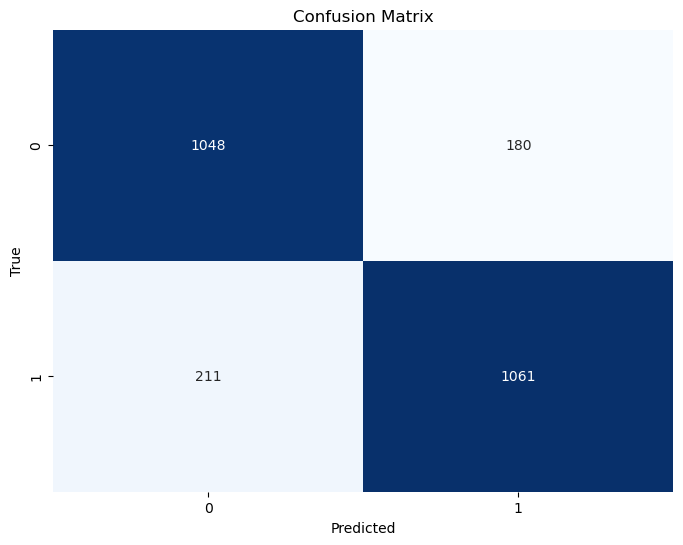

In [126]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Çapraz doğrulama ile model performansını değerlendirme

In [127]:
cv_scores = cross_val_score(model, train_x, y_train, cv=5, scoring='roc_auc', n_jobs=-1)
print("Çapraz doğrulama ortalaması: %", np.mean(cv_scores) * 100)

Çapraz doğrulama ortalaması: % 92.08697006883978
